In [2]:
import os
os.chdir("E:\Data Science\R Programs\Csv files")
os.getcwd()

'E:\\Data Science\\R Programs\\Csv files'

In [ ]:
# A chinese company wants to enter US Market, they wanted to set up a manufacturing plant in US.
# They have hired a company to collect data for the cars with their specs. and price.
# They wanted to understand how different car price is dependent on the different specifications #

# two important considerations for car company to understand : ( Goal of this project)

# 1) Which are different significant independent variables on the which car price depends ( significant variables)
# 2) how well this signifivant indepdent variables describe the price of the car  ( R square)


In [ ]:
# Model Build : 
# You are required to model the price of cars with the available independent variables. 
#It will be used by the management to understand how exactly the prices vary with the independent variables. 
#They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
# Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [3]:
# reading a file #
import pandas as pd
df = pd.read_csv("carPrice.csv")
df.head()

,car_ID,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
df.carCompany.value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
mercury           1
Name: carCompany, dtype: int64

In [4]:
df.shape

(205, 26)

In [5]:
# target variable : Price of the car # 
# PreProcessing steps #

# 1) Missing values :
df.isnull().sum()

car_ID              0
symboling           0
carCompany          0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# drop the duplicates #

df = df.drop_duplicates()
df.shape

(205, 26)

In [ ]:
# there are no redundant entries #

In [8]:
df.info()
# checking the data types of all the variables #

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
carCompany          205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [ ]:
# feature transformation step can be dome after visualization as well #

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

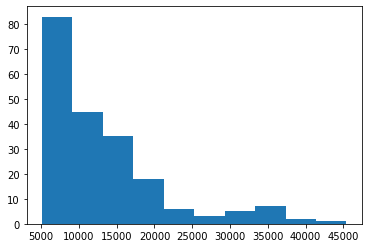

In [8]:
# checking all pre rules for regression #
# 4) checking the distribution for car price, it needs to follow normal distribution #

plt.hist(df['price'],bins=10)
plt.show()

# The distribution is rightly skewed #

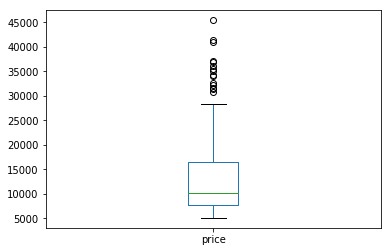

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


In [21]:
df.price.plot.box()
plt.show()

print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

# from the data, we can get that 85% of the car prices are lower than 18,500 and only 15% are more than that, max price : 45,400

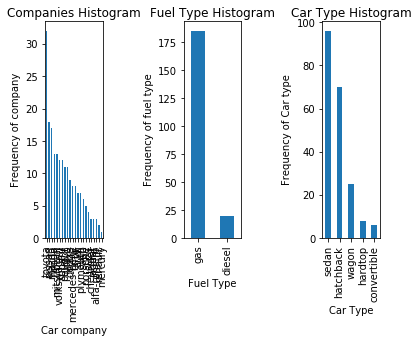

In [30]:
# visualizing the categorical variables #


plt.subplot(1,5,1)
plt1 = df.carCompany.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,5,3)
plt1 = df.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,5,5)
plt1 = df.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()


# there are more cars of toyota, more cars of type gas and more of sedan type

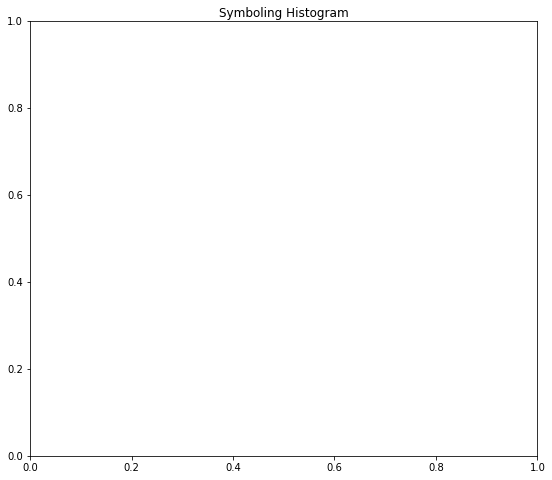

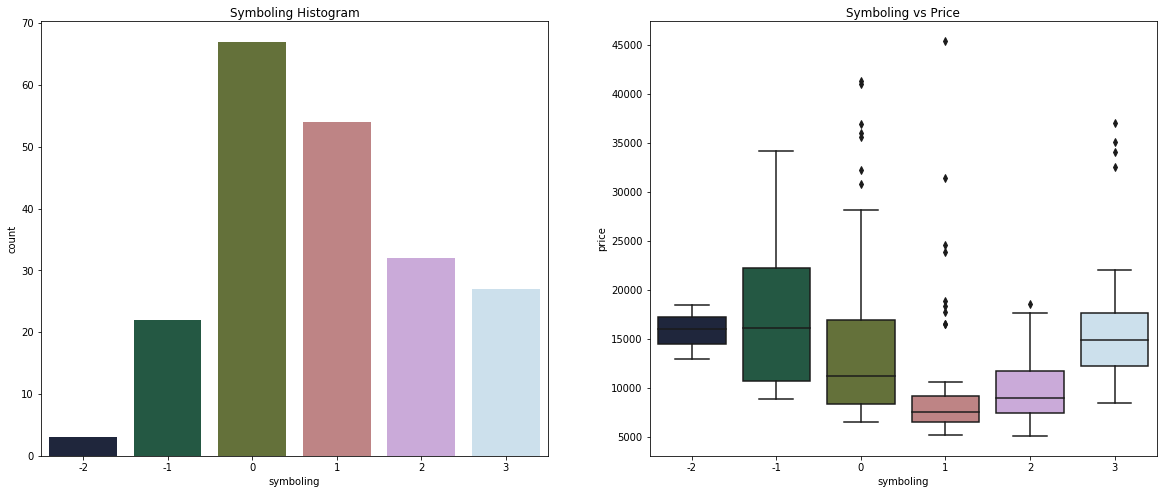

In [6]:
# Visualization for all the independent variables #
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

In [3]:
df.columns

# we can create plots for visualization for drive wheel, carCompany vs. avg.price, engine type vs. avg price, fuel system  vs  avg price, 
# We can plot bar charts for carCompany, engine type, fuel type etc
# we can create box plots for carCompany, fuel type, engine type vs. price, which gives highest car price 
# We can box plot for visualizarion for 'citympg', 'highwaympg' vs car company, highway mpg

Index(['car_ID', 'symboling', 'carCompany', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

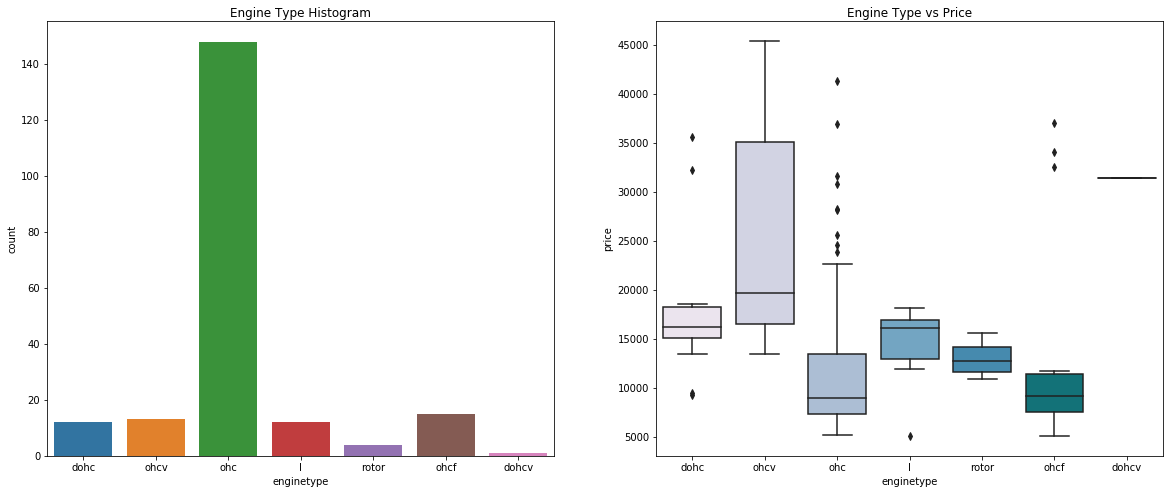

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype)

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))
plt.show()

# there maximum cars of ohc type and ohcv type has the highest car price

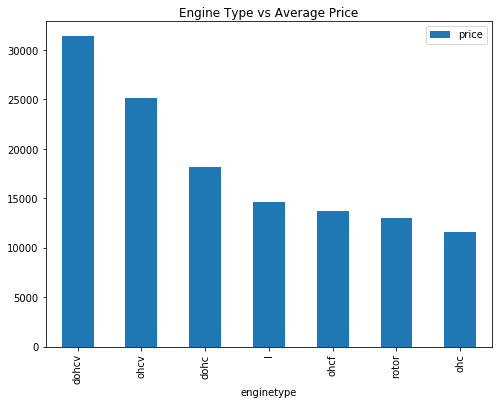

In [56]:
# There are large no. of ohc engine type available in the data and OHCV type has the highest price amoung all #

df1 = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

# dohcv has the highest avg. price amoung all models #

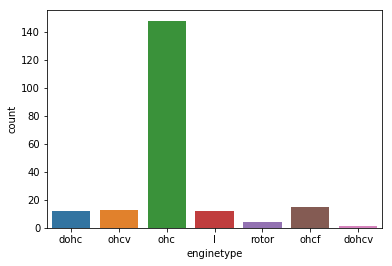

In [60]:
# For reference and understanding :

# with the help of sns we can plot bar chart and boxplot #

# scatter and histogram cannotr be plotted through seaborn package

sns.countplot(df['enginetype'])
plt.show()

sns.boxplot(df['price'])
plt.show()

# With the help of matplotlib we can plot histogram, boxplot, bar chart and scatter plot 

df.carCompany.value_counts().plot('bar')
plt.show()

plt.scatter(x=df['price'],y=df['citympg'])
plt.show()

plt.boxplot(df['price'])
plt.show()

plt.hist(df['price'])
plt.show()

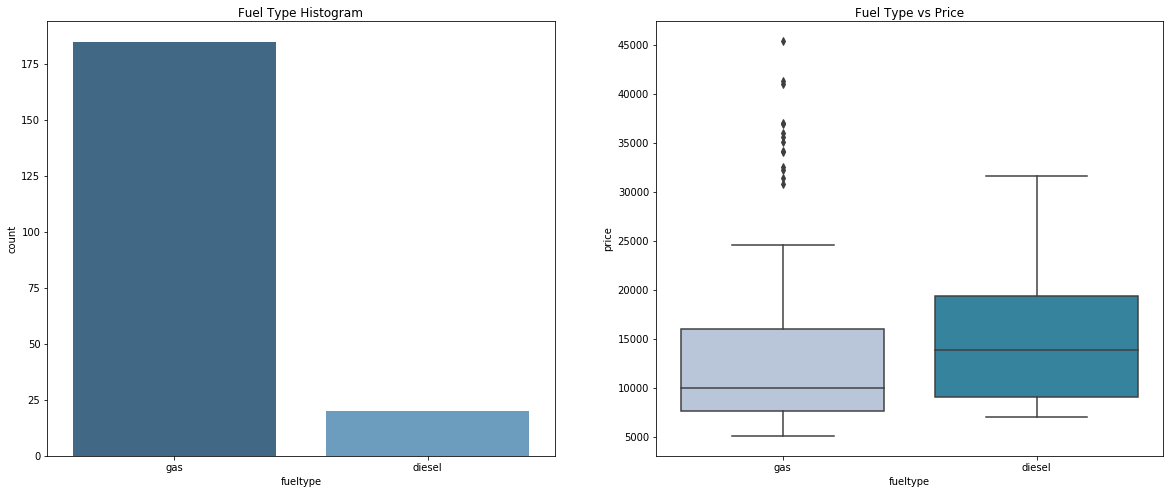

In [9]:
# same way can plot for fuel type just like the carCompany #

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(df.fueltype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=df.fueltype, y=df.price, palette=("PuBuGn"))
plt.show()

# there  are more cars of gas type as compared to the diesel type and some diesel cars have higeher price as compared to the diesl cars #

# There is relationship between Fuel type and price of the cars #

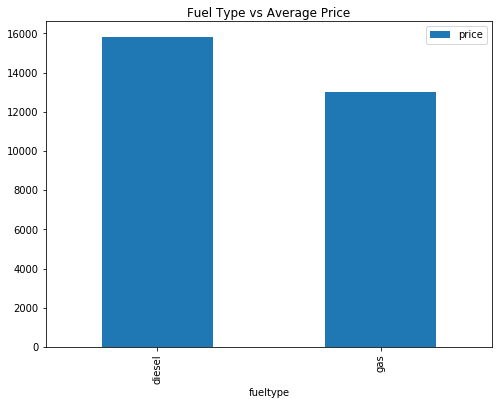

In [10]:
# What is average price for different fuel type cars #

df1 = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Fuel Type vs Average Price')
plt.show()


# Diesel cars have higher avg price as compared to the gas type cars #

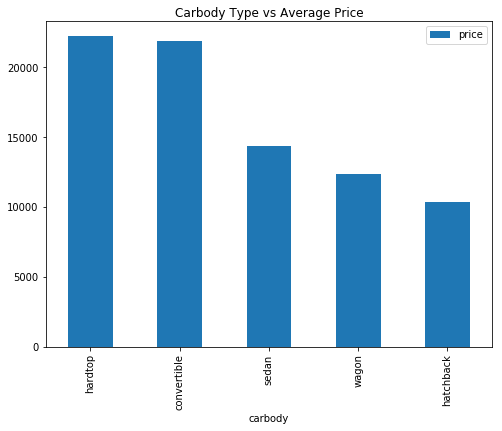

In [12]:
df1 = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Carbody Type vs Average Price')
plt.show()

# hardtrop and convertoble have higher avg price as compared to all other body types

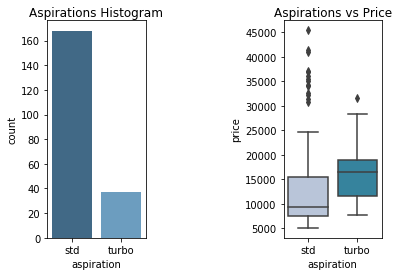

In [15]:
# For all categorical independent variables find the relationship with target variable, through the help of box plot
# For all numerical independent variables, we can find tyhe relationship with target variable, with help of scatter plot

# For Aspirations, we need to find price range and its relationship with the target variable #

plt.subplot(1,3,1)
plt.title('Aspirations Histogram')
sns.countplot(df.aspiration, palette=("Blues_d"))

plt.subplot(1,3,3)
plt.title('Aspirations vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("PuBuGn"))
plt.show()

# Aspiration with turbo have higher price as compared to std aspiration (except values above upper whisker) #
# there is a relationship between aspiration and price 

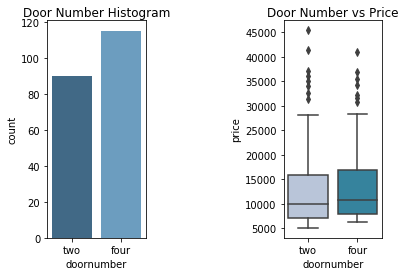

In [16]:
# Door number and price of the car #

plt.subplot(1,3,1)
plt.title('Door Number Histogram')
sns.countplot(df.doornumber, palette=("Blues_d"))

plt.subplot(1,3,3)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("PuBuGn"))
plt.show()

# from this plot, we can say change in door number does not change the price of the car #

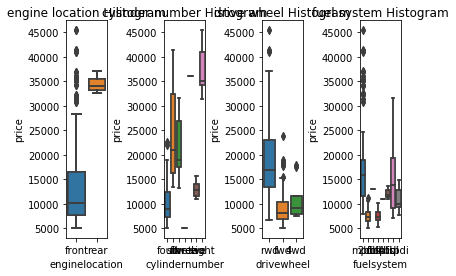

In [28]:
# same we can plot for engine location, cylinder number, drive wheel, fuel system , against price #

plt.subplot(1,7,1)
plt.title('engine location Histogram')
sns.boxplot(x=df.enginelocation, y=df.price)

plt.subplot(1,7,3)
plt.title('cylinder number Histogram')
sns.boxplot(x=df.cylindernumber, y =df.price)

plt.subplot(1,7,5)
plt.title('drive wheel Histogram')
sns.boxplot(x=df.drivewheel, y =df.price)

plt.subplot(1,7,7)
plt.title('fuel system Histogram')
sns.boxplot(x=df.fuelsystem, y =df.price)

plt.show()


# 1) There is relationship between engine location and price, front engine location are having higher price
# 2) Relatonsjip between cylinder number and price, 8 no cylinder cars are having higher price
# 3) Relationship between drive wheel and price, rwd wheels are having higher price
# 4) Relatonship between fuel system and price, idi are having higher price

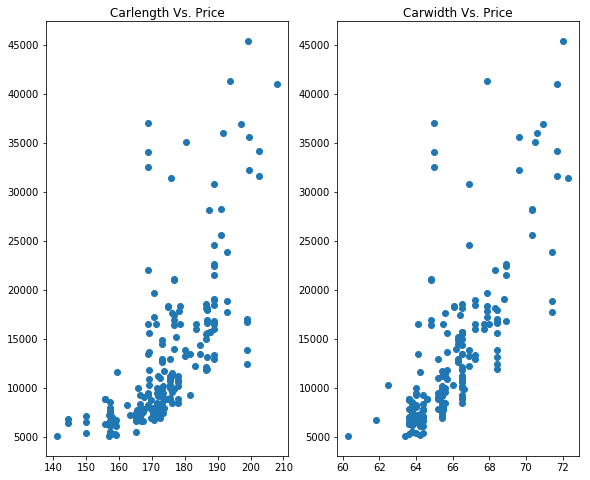

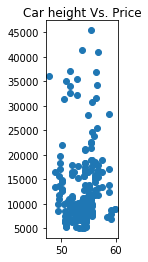

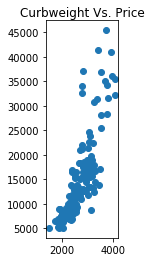

In [10]:
# Visualizing te relationship of tartget variable with numericak variables #

df.columns 

# Numerical variables for scatter plot : carlength, car width, car gheight, curbweight, compression ratio, horsepower, citympg, highwaympg

plt.figure(figsize=(20,8))

plt.subplot(1,4,1)
plt.title('Carlength Vs. Price')
plt.scatter(x=df.carlength, y=df.price)

plt.subplot(1,4,2)
plt.title('Carwidth Vs. Price')
plt.scatter(x=df.carwidth, y=df.price)
plt.show()


plt.subplot(1,4,3)
plt.title('Car height Vs. Price')
plt.scatter(x=df.carheight, y=df.price)
plt.show()


plt.subplot(1,4,4)
plt.title('Curbweight Vs. Price')
plt.scatter(x=df.curbweight, y=df.price)
plt.show()


# From this plots, we can infer that curbweight, car lenght, car widht seems to have positive correlation with the price, while car height does not have any significant relation relatiin with price #

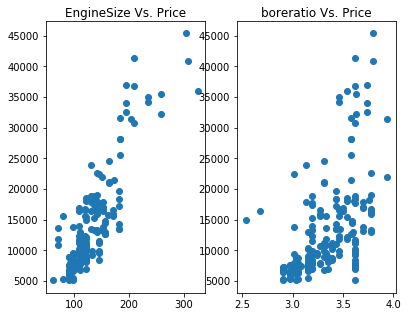

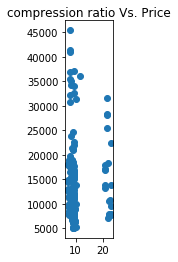

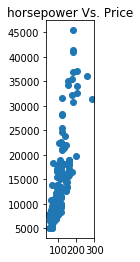

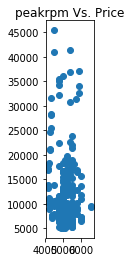

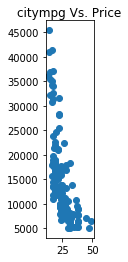

In [16]:
# same way 

df.columns

# variables to be plotted : engine size, boreratio, stroke, compression ratio, horsepower, peakrom, citympg, highway mpg

df.columns 


plt.figure(figsize=(20,5))

plt.subplot(1,6,1)
plt.title('EngineSize Vs. Price')
plt.scatter(x=df.enginesize, y=df.price)

plt.subplot(1,6,2)
plt.title('boreratio Vs. Price')
plt.scatter(x=df.boreratio, y=df.price)
plt.show()


plt.subplot(1,6,3)
plt.title('compression ratio Vs. Price')
plt.scatter(x=df.compressionratio, y=df.price)
plt.show()


plt.subplot(1,6,4)
plt.title('horsepower Vs. Price')
plt.scatter(x=df.horsepower, y=df.price)
plt.show()

plt.subplot(1,6,5)
plt.title('peakrpm Vs. Price')
plt.scatter(x=df.peakrpm, y=df.price)
plt.show()

plt.subplot(1,6,6)
plt.title('citympg Vs. Price')
plt.scatter(x=df.citympg, y=df.price)
plt.show()

# Fromt this plot, bore ratio, engine size, horsepower have positive corelation with price
# peakrpm and compression ratio does not hold any significant relationship with price

# cityrpm has a neagtive corelatioon with price #

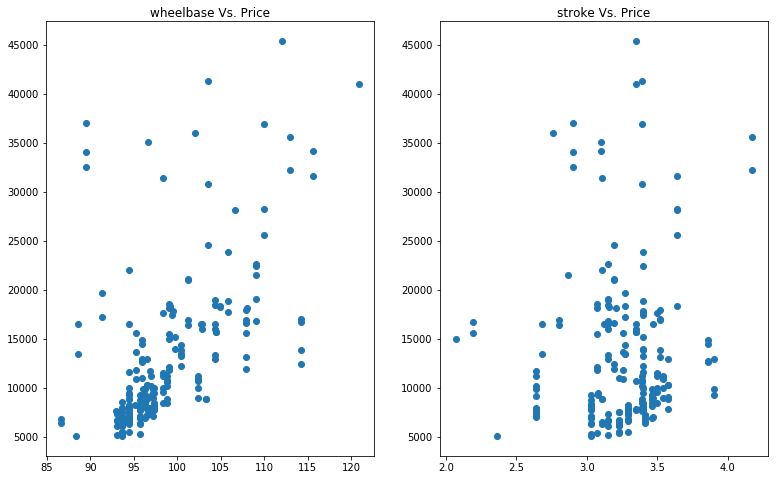

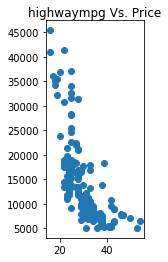

In [17]:
# highwaympg , wheel base and stroke with price #
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('wheelbase Vs. Price')
plt.scatter(x=df.wheelbase, y=df.price)

plt.subplot(1,3,2)
plt.title('stroke Vs. Price')
plt.scatter(x=df.stroke, y=df.price)
plt.show()


plt.subplot(1,3,3)
plt.title('highwaympg Vs. Price')
plt.scatter(x=df.highwaympg, y=df.price)
plt.show()

# wheel base has a positive coreelation with price
# stroke has no corelation with price
# highway mpg has a negatove corelation with price

In [21]:
# List of significant variables #

#Car company,engine locartion, fuel system, Engine Type, fuel type, Car Body, Aspiration, Cylinder Number, Drivewheel, Curbweight, Car Length, Car width, Engine Size, Boreratio, Horse Power,   Wheel base , Fuel Economy

#target variable : Price

# City mpg and highway mpg are output performance parameters, they are not input specs. so we dont take for model building #
df.columns

df1 = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'carlength','carwidth', 'enginelocation', 'fuelsystem', 'carCompany']]
df1.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,enginelocation,fuelsystem,carCompany
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,front,mpfi,alfa-romero
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,front,mpfi,alfa-romero
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5,front,mpfi,alfa-romero
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2,front,mpfi,audi
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4,front,mpfi,audi


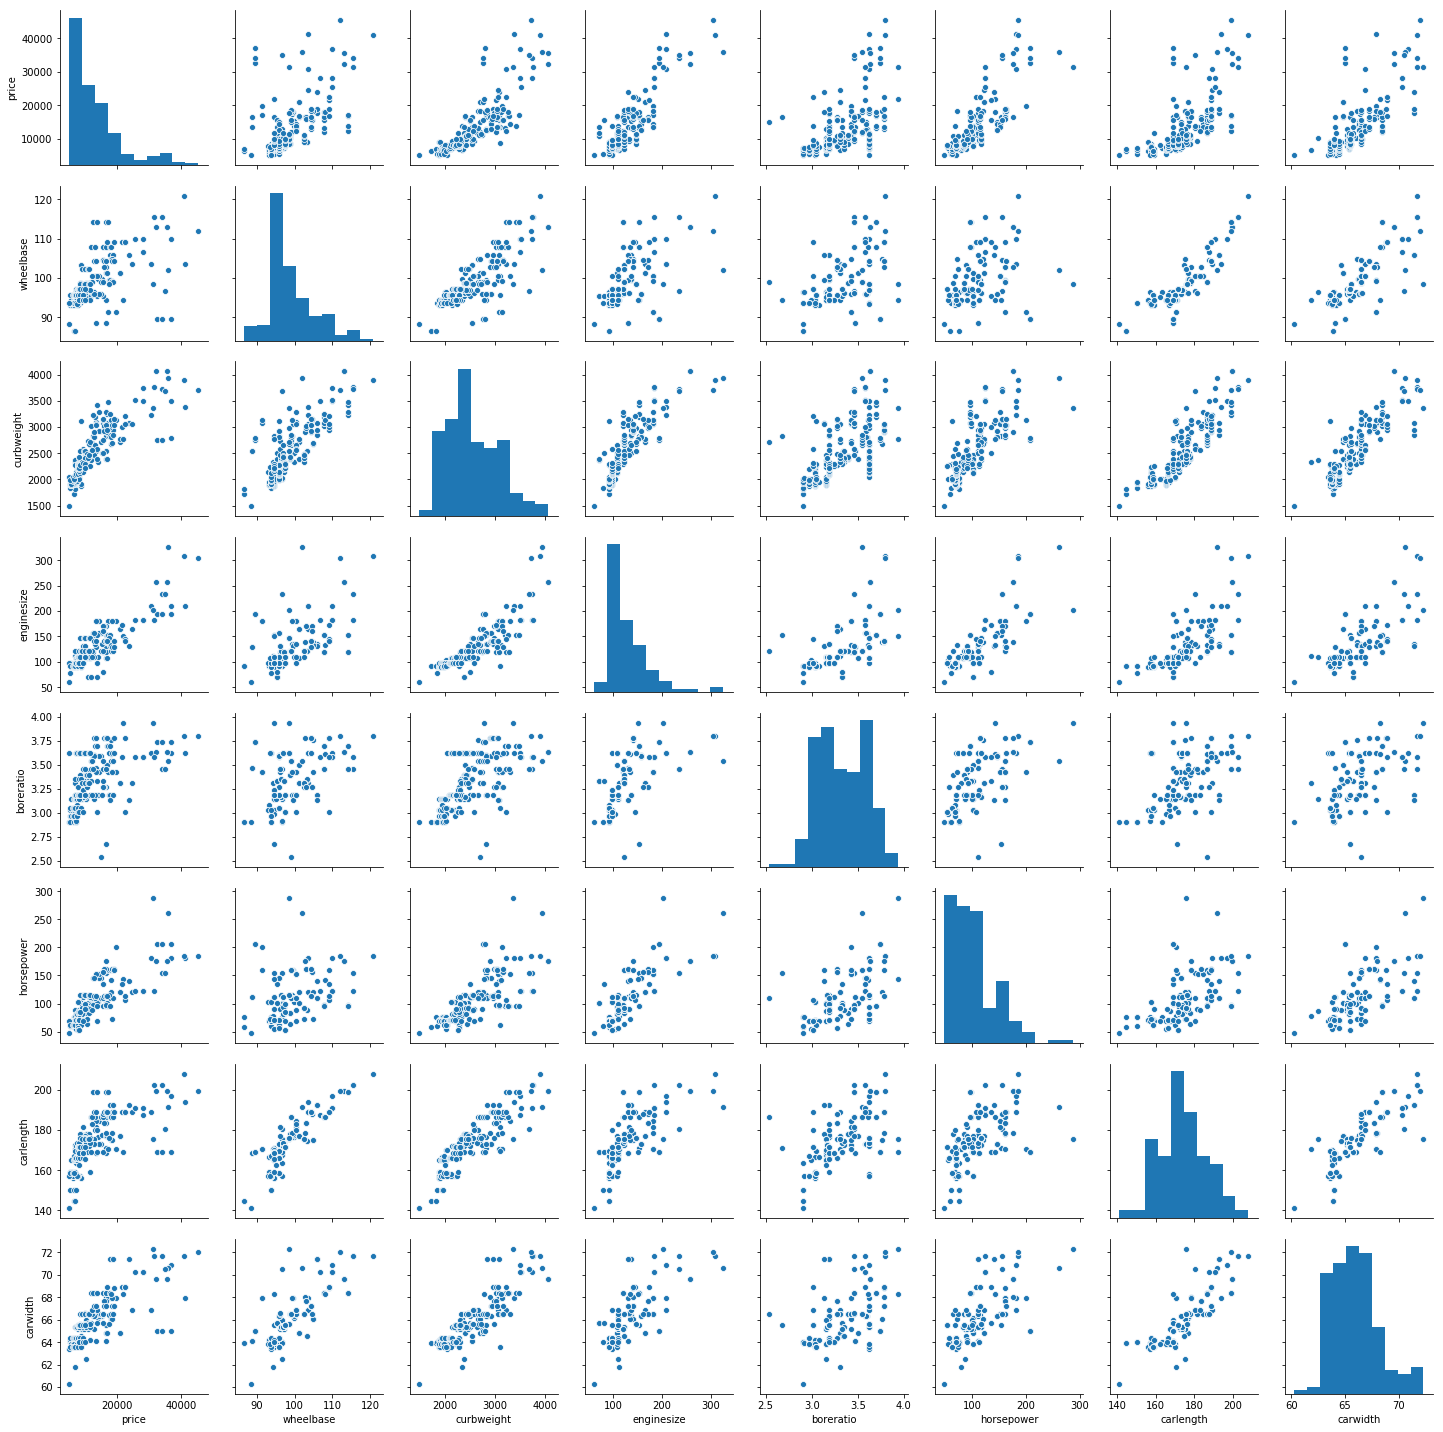

In [22]:
sns.pairplot(df1)
plt.show()

# we can indentify the relationship between all the available variables #

# We can verify the relationship of significant numerical variables with target variable, as per 1st plot of priceall are significant

# As we can check for correlation between independent variables #


In [ ]:
# further analysis for this project is continued in next python sheet #